<a href="https://colab.research.google.com/github/orinbou/qc-workbook/blob/bug_fix%2Fgoogle_colab_runnable/GoogleColab/Qiskit_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# クラウド環境でQiskitを使う手順 (Google Colabの場合)

https://qiita.com/kifumi/items/51a5d2a420e6318f78fb

In [ ]:
!pip install qiskit qiskit-ibm-runtime jupyter qiskit-aer qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.8/340.8 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.1 MB/s eta 0:00:00
   ━━━━━━

# Qiskit で Hello world

https://docs.quantum.ibm.com/guides/hello-world

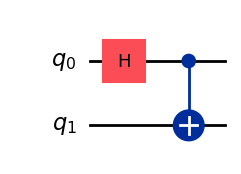

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

# CHSH不等式の破れを確認する

https://utokyo-icepp.github.io/qc-workbook/ja/chsh_inequality.html

## 量子ビット、量子レジスタ

In [ ]:
from qiskit import QuantumRegister
register = QuantumRegister(4, 'myregister')

## ゲート、回路、測定

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister
register = QuantumRegister(4, 'myregister')
circuit = QuantumCircuit(register)

In [ ]:
circuit.h(register[1])

In [ ]:
circuit.measure_all()

## CHSH不等式を計算する回路を書く

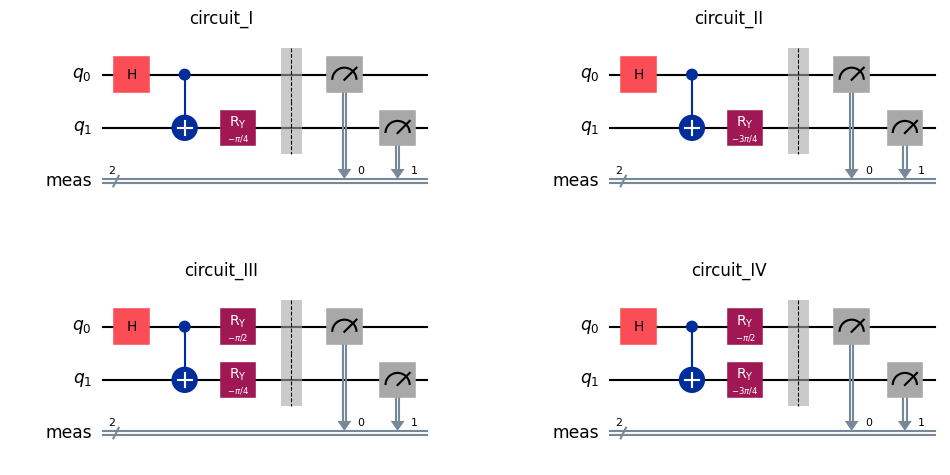

In [ ]:
circuits = []

# Circuit I - H, CX[0, 1], Ry(-π/4)[1]
circuit = QuantumCircuit(2, name='circuit_I')
circuit.h(0)
circuit.cx(0, 1)
circuit.ry(-np.pi / 4., 1)
circuit.measure_all()
# Append to list
circuits.append(circuit)

# Circuit II - H, CX[0, 1], Ry(-3π/4)[1]
circuit = QuantumCircuit(2, name='circuit_II')
circuit.h(0)
circuit.cx(0, 1)
circuit.ry(-3. * np.pi / 4., 1)
circuit.measure_all()
# Append to list
circuits.append(circuit)

# Circuit III - H, CX[0, 1], Ry(-π/4)[1], Ry(-π/2)[0]
circuit = QuantumCircuit(2, name='circuit_III')
circuit.h(0)
circuit.cx(0, 1)
circuit.ry(-np.pi / 4., 1)
circuit.ry(-np.pi / 2., 0)
circuit.measure_all()
# Append to list
circuits.append(circuit)

# Circuit IV - H, CX[0, 1], Ry(-3π/4)[1], Ry(-π/2)[0]
circuit = QuantumCircuit(2, name='circuit_IV')
circuit.h(0)
circuit.cx(0, 1)
circuit.ry(-3. * np.pi / 4., 1)
circuit.ry(-np.pi / 2., 0)
circuit.measure_all()
# Append to list
circuits.append(circuit)

# draw() can accept a matplotlib Axes object as an argument, to which the circuit will be drawn
# This is useful when visualizing multiple circuits from a single Jupyter cell
fig, axs = plt.subplots(2, 2, figsize=[12., 6.])
for circuit, ax in zip(circuits, axs.reshape(-1)):
    circuit.draw('mpl', ax=ax)
    ax.set_title(circuit.name)

## 回路を実機で実行する

In [ ]:
# Specify an instance if you have access to multiple (e.g. premium access plan）
# instance = 'hub-x/group-y/project-z'
instance = None

try:
    service = QiskitRuntimeService(channel='ibm_quantum', instance=instance)
except AccountNotFoundError:
    service = QiskitRuntimeService(channel='ibm_quantum', token='__paste_your_token_here__', instance=instance)

qc_workbook/utils.py

なしでも動作するよう上記ソースコードと以下のリンク先の情報を参考に微修正。

https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.QiskitRuntimeService

と

https://kimbio.info/qiskit-pass-manager/

量子コンピュータを利用するといっても、全部を利用するわけではない。

また、自分だけが独占して利用しているわけではなく、多くのユーザに計算リソースを適切に割り当てる必要がある。

そこで量子コンピュータのバックエンドを適切に選択してやる必要がある。

下記のコードでは、least_busy で最も空いているものを探してくる。

また、引数に与えているように、シミュレータではなく、動作中のコンピュータを割り当てるようにしている。

In [ ]:
# Find the backend that is operational and has the shortest job queue
backend = service.least_busy(simulator=False, operational=True)
#backend = service.least_busy(filters=operational_backend())
sampler = Sampler(backend)

print(f'Jobs will run on {backend.name}')

Jobs will run on ibm_kyiv


In [ ]:
# max_shots = the maximum number of allowed shots for this backend with the access parameters
shots = min(backend.max_shots, 2000)
print(f'Running four circuits, {shots} shots each')

circuits = transpile(circuits, backend=backend)
# Execute each circuit for `shots` times
job = sampler.run(circuits, shots=shots)

Running four circuits, 2000 shots each


## 量子測定結果の解析

※実行にめちゃ時間がかかった（約20分）

In [ ]:
result = job.result()

# List to collect the histogram data from the four circuits
counts_list = []

# Extracting the bit sequence counts from the result object
for idx in range(4):
    # get_counts(i) returns the histogram data for circuit i
    counts = result[idx].data.meas.get_counts()
    # Append to list
    counts_list.append(counts)

print(counts_list)

[{'11': 874, '01': 144, '00': 820, '10': 162}, {'10': 855, '01': 816, '11': 170, '00': 159}, {'11': 842, '00': 839, '10': 172, '01': 147}, {'00': 836, '11': 861, '01': 138, '10': 165}]


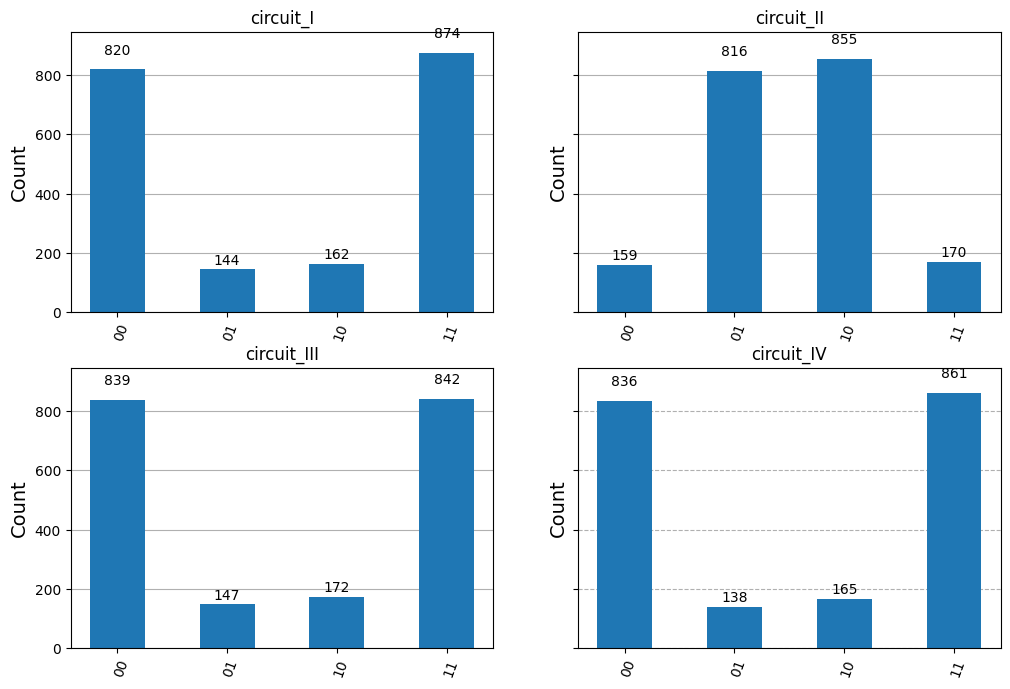

In [ ]:
fig, axs = plt.subplots(2, 2, sharey=True, figsize=[12., 8.])
for counts, circuit, ax in zip(counts_list, circuits, axs.reshape(-1)):
    plot_histogram(counts, ax=ax)
    ax.set_title(circuit.name)
    ax.yaxis.grid(True)

In [ ]:
# C^I, C^II, C^III, C^IVを一つのアレイにする
#（今の場合ただのリストにしてもいいが、純粋な数字の羅列にはnumpy arrayを使うといいことが多い）
c_arr = np.zeros(4, dtype=float)

# enumerate(L)でリストのインデックスと対応する要素に関するループを回せる
for ic, counts in enumerate(counts_list):
    # counts['00'] でなく counts.get('00', 0) - 上のテキストを参照
    c_arr[ic] = counts.get('00', 0) + counts.get('11', 0) - counts.get('01', 0) - counts.get('10', 0)

# 4つの要素を同時にshotsで規格化（リストではこういうことはできない）
c_arr /= shots

s_val = c_arr[0] - c_arr[1] + c_arr[2] + c_arr[3]

print('C:', c_arr)
print('S =', s_val)
if s_val > 2.:
    print('Yes, we are using a quantum computer!')
else:
    print('Armonk, we have a problem.')

C: [ 0.694 -0.671  0.681  0.697]
S = 2.7430000000000003
Yes, we are using a quantum computer!


# 無事、が2を超えました。 ← S = 2.7430000000000003

* 実験：|C| > 2

* 量子論：|C| = 2√2 ≒ 2.8284 （チレルソン限界：|C|の最大値）


# 参考情報

* ノーベル賞解説：「量子もつれ」からCHSH不等式まで

  https://youtube.com/watch?v=cR8M9ruFUpM&si=Ul7OBkGzOnxd2Ssu

  > Qiskit（キスキット）は、IBMが開発した量子コンピューター用のオープンソースのフレームワークです。量子回路を作成・実行するためのツールを提供し、量子コンピューティングの分野での研究や開発に広く利用されています。

  https://github.com/quantum-tokyo/introduction/blob/main/qiskit_textbook/9_Games/Bell-CHSH_inequality_NobelPrize2022.pdf


* IBM量子コンピュータ（サービス）

  https://quantum.ibm.com/

* CHSH不等式の破れを確認する

  https://utokyo-icepp.github.io/qc-workbook/ja/chsh_inequality.html

* クラウド環境でQiskitを使う手順 (Google Colabの場合)

  https://qiita.com/kifumi/items/51a5d2a420e6318f78fb

* 【Qiskit】パスマネージャと量子回路最適化

  https://kimbio.info/qiskit-pass-manager/

* ベルの不等式とは何か(CHSH不等式)

  https://www.youtube.com/watch?v=O99Zy-6YwoU
